<a href="https://colab.research.google.com/github/cbermell/Proyecto-Algebra-Lineal/blob/main/Proyecto_Algebra_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
  <img src="https://raw.githubusercontent.com/cbermell/Proyecto-Algebra-Lineal/main/IMG1.jpg"
       height="150">
</center>

<hr>

# Proyecto: Gráficos por Computadora 2D y Transformaciones Lineales

## Objetivo del Proyecto

El objetivo de este proyecto es aplicar los conceptos teóricos de las
<strong>Transformaciones Lineales</strong> (rotación, escalamiento,
traslación y corte) utilizando notación matricial y la
librería <strong>NumPy</strong> de Python.

Demostrar cómo una matriz de transformación puede
modificar un objeto geométrico en un plano bidimensional, visualizando
cada transformación mediante <strong>Matplotlib</strong>.

---

## Conceptos Clave de Álgebra Lineal Aplicados

- Vectores en $\mathbb{R}^2$
- Multiplicación de matrices y vectores
- Matrices de transformación lineal:
  - Rotación
  - Escalamiento
  - Corte
- Coordenadas homogéneas (para incluir traslaciones)

---

## Herramientas Utilizadas

<table style="margin-left: auto; margin-right: auto;">
  <tr>
    <td align="center" width="140">
      <img src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg" width="45"><br>
      <strong>Python</strong>
    </td>
    <td align="center" width="140">
      <img src="https://upload.wikimedia.org/wikipedia/commons/3/31/NumPy_logo_2020.svg" width="100"><br>
      <strong>NumPy</strong>
    </td>
    <td align="center" width="140">
      <img src="https://upload.wikimedia.org/wikipedia/commons/8/84/Matplotlib_icon.svg" width="45"><br>
      <strong>Matplotlib</strong>
    </td>
    <td align="center" width="140">
      <img src="https://upload.wikimedia.org/wikipedia/commons/d/d0/Google_Colaboratory_SVG_Logo.svg" width="70"><br>
      <strong>Google Colab</strong>
    </td>
  </tr>
</table>

---

## Resultados Esperados

- Representación gráfica de un objeto geométrico en 2D
- Aplicación de distintas transformaciones lineales mediante matrices
- Visualización clara del objeto <strong>antes y después</strong> de cada
  transformación
- Uso de coordenadas homogéneas para realizar traslaciones

---

<blockquote>
<strong>Nota:</strong> Este notebook está organizado de forma progresiva:
primero se define el objeto original, luego se aplican las
transformaciones y finalmente se analizan los resultados obtenidos.
</blockquote>

<h2>1. Introducción Teórica</h2>

<h3>1.1 Definición General (Espacios Vectoriales)</h3>

<p>
  Sean $V$ y $W$ dos espacios vectoriales sobre un cuerpo $\mathbb{K}$ (en nuestro caso, los números reales $\mathbb{R}$).
  Una <strong>Transformación Lineal</strong> es una función $T: V \to W$ que respeta la estructura lineal de dichos espacios.
</p>

<p>
  Para que $T$ sea considerada lineal, debe cumplir estrictamente con dos propiedades para todo $\mathbf{u}, \mathbf{v} \in V$ y todo escalar $c \in \mathbb{K}$:
</p>

<ul>
  <li>
    <strong>1. Aditividad (Preservación de la suma):</strong><br>
    $$T(\mathbf{u} + \mathbf{v}) = T(\mathbf{u}) + T(\mathbf{v})$$
  </li>
  <li>
    <strong>2. Homogeneidad (Preservación del producto por escalar):</strong><br>
    $$T(c\mathbf{u}) = cT(\mathbf{u})$$
  </li>
</ul>

<div style="background-color: #e8f4f8; padding: 15px; border-radius: 5px; border-left: 5px solid #007bff;">
  <p>
    <strong>Propiedad Fundamental:</strong><br>
    De estas dos propiedades se deduce una consecuencia crítica: una transformación lineal <strong>siempre debe mapear el vector cero al vector cero</strong>.
    $$ T(\mathbf{0}_V) = \mathbf{0}_W $$
  </p>
</div>

<p>
  En el contexto de <strong>Gráficos por Computadora</strong>, trabajamos con espacios vectoriales de dimensión finita.
  Por lo tanto, cualquier transformación lineal $T$ puede representarse mediante una multiplicación matricial:
  $$ T(\mathbf{v}) = A\mathbf{v} $$
</p>

<hr>

<h3>1.2 El Problema de la Traslación</h3>

<p>
  La traslación de un objeto geométrico se define sumando un vector constante $\mathbf{t}$ a un vector posición $\mathbf{v}$:
  $$ T(\mathbf{v}) = \mathbf{v} + \mathbf{t} $$
</p>

<p>
  Si analizamos esto bajo la definición general de espacio vectorial, vemos que falla en la propiedad fundamental del vector cero (si $\mathbf{t} \neq \mathbf{0}$):
</p>

$$ T(\mathbf{0}) = \mathbf{0} + \mathbf{t} = \mathbf{t} \neq \mathbf{0} $$

<p>
  Como el origen se desplaza, <strong>la traslación no es una transformación lineal</strong> en el espacio vectorial estándar.
  Esto impide que podamos representarla directamente como una matriz en el mismo espacio.
</p>

<br>

<h3>1.3 Solución: Coordenadas Homogéneas</h3>

<p>
  Para resolver esto, proyectamos nuestro espacio original 2D dentro de un espacio vectorial de mayor dimensión (3D).
  Utilizamos <strong>Coordenadas Homogéneas</strong>, representando un vector $(x, y) \in \mathbb{R}^2$ como $(x, y, 1) \in \mathbb{R}^3$.
</p>

<p>
  Esto nos permite linealizar la traslación convirtiéndola en una operación de corte en la tercera dimensión,
  recuperando así la capacidad de usar matrices para todas las operaciones:
</p>

$$
\begin{bmatrix} x' \\ y' \\ 1 \end{bmatrix} =
\begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1
\end{bmatrix}
\cdot
\begin{bmatrix} x \\ y \\ 1 \end{bmatrix}
$$

<h2>2. Definición del Objeto Base</h2>

<p style="text-align: justify;">
  Para poner a prueba nuestras matrices de transformación, necesitamos un objeto geométrico sobre el cual operar.
  Elegiremos una figura asimétrica para poder distinguir claramente su orientación después de las transformaciones.
</p>

<h3>2.1 Representación Matricial</h3>

<p style="text-align: justify;">
  En álgebra lineal aplicada a computación, un objeto de $N$ vértices se representa como una matriz $P$ de dimensiones $3 \times N$ (usando coordenadas homogéneas).
</p>

<ul>
  <li>Cada <strong>columna</strong> de la matriz representa un punto (vértice) de la figura.</li>
  <li>Las <strong>filas</strong> representan las coordenadas $x$, $y$, y el componente homogéneo $1$.</li>
</ul>

<div style="background-color: #f9f9f9; padding: 15px; border-left: 5px solid #ffc107; box-shadow: 2px 2px 5px rgba(0,0,0,0.1);">
  <p style="margin: 0;">
    <strong>Estructura de la Matriz de Vértices ($P$):</strong>
  </p>
  $$
  P =
  \begin{bmatrix}
  x_1 & x_2 & \dots & x_N \\
  y_1 & y_2 & \dots & y_N \\
  1   & 1   & \dots & 1
  \end{bmatrix}
  $$
</div>

<br>

<h3>2.2 Selección de la Figura: "La Casa"</h3>

<p style="text-align: justify;">
  Definimos una figura simple tipo "Casa" compuesta por 5 vértices principales.
  Los puntos se definen en orden antihorario para formar el perímetro cerrado:
</p>

<ul>
  <li>$\mathbf{v}_1 = (0, 0)$ : Esquina inferior izquierda (Origen).</li>
  <li>$\mathbf{v}_2 = (2, 0)$ : Esquina inferior derecha.</li>
  <li>$\mathbf{v}_3 = (2, 2)$ : Esquina superior derecha.</li>
  <li>$\mathbf{v}_4 = (1, 3)$ : Techo (Punta).</li>
  <li>$\mathbf{v}_5 = (0, 2)$ : Esquina superior izquierda.</li>
</ul>

<p>
  La matriz $P$ resultante en <strong>Coordenadas Homogéneas</strong> será:
</p>

$$
P_{casa} =
\begin{bmatrix}
0 & 2 & 2 & 1 & 0 & 0 \\
0 & 0 & 2 & 3 & 2 & 0 \\
1 & 1 & 1 & 1 & 1 & 1
\end{bmatrix}
$$

<p style="font-size: 0.9em; color: gray;">
  <em>Nota: Se repite el primer punto $(0,0)$ al final de la matriz (sexta columna) para asegurar que el gráfico cierre la figura perfectamente.</em>
</p>

<h2>3. Implementación de Transformaciones Fundamentales</h2>

<p style="text-align: justify;">
  En esta sección, traduciremos las fórmulas matemáticas definidas anteriormente a código ejecutable utilizando la librería <strong>NumPy</strong>.
</p>

<p style="text-align: justify;">
  Implementaremos una función para cada tipo de transformación. Estas funciones recibirán los parámetros necesarios (ángulos, factores de escala, desplazamientos) y retornarán la <strong>Matriz de Transformación $3 \times 3$</strong> correspondiente.
</p>

<div style="background-color: #f1f8ff; padding: 10px; border-left: 4px solid #0366d6;">
  <strong>Nota Técnica:</strong>
  NumPy trabaja con radianes para las funciones trigonométricas ($\sin, \cos$).
  Por ello, dentro de la función de rotación, convertiremos los grados a radianes automáticamente.
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
'''
1. DEFINICIÓN DEL OBJETO BASE (LA CASA)
Matriz P de 3 filas x 6 columnas (repetimos el punto inicial al final para cerrar el dibujo)
Fila 0: Coordenadas X
Fila 1: Coordenadas Y
Fila 2: Componente Homogéneo (siempre 1)
'''
P_casa = np.array([
    [0, 2, 2, 1, 0, 0],  # X
    [0, 0, 2, 3, 2, 0],  # Y
    [1, 1, 1, 1, 1, 1]   # w (homogéneo)
])

In [5]:
# 2. DEFINICIÓN DE MATRICES DE TRANSFORMACIÓN
def obtener_matriz_traslacion(tx, ty):
    """
    Genera la matriz de traslación 3x3.
    Parámetros:
      tx: Desplazamiento en X
      ty: Desplazamiento en Y
    """
    T = np.identity(3)
    T[0, 2] = tx  # Columna 2, Fila 0
    T[1, 2] = ty  # Columna 2, Fila 1
    return T

def obtener_matriz_escalado(sx, sy):
    """
    Genera la matriz de escalamiento 3x3.
    Parámetros:
      sx: Factor de escala en X
      sy: Factor de escala en Y
    """
    S = np.identity(3)
    S[0, 0] = sx
    S[1, 1] = sy
    return S

def obtener_matriz_rotacion(grados):
    """
    Genera la matriz de rotación 3x3 (Antihoraria).
    Parámetros:
      grados: Ángulo en GRADOS (se convierte a radianes automáticamente)
    """
    # Convertimos grados a radianes porque np.cos y np.sin lo requieren
    theta = np.radians(grados)
    c = np.cos(theta)
    s = np.sin(theta)

    R = np.array([
        [c, -s, 0],
        [s,  c, 0],
        [0,  0, 1]
    ])
    return R

def obtener_matriz_corte(kx, ky):
    """
    Genera la matriz de corte (Shear) 3x3.
    Parámetros:
      kx: Factor de corte horizontal
      ky: Factor de corte vertical
    """
    Sh = np.identity(3)
    Sh[0, 1] = kx # Inclina X respecto a Y
    Sh[1, 0] = ky # Inclina Y respecto a X
    return Sh

print("✅ Funciones de transformación y Objeto Casa definidos correctamente.")

✅ Funciones de transformación y Objeto Casa definidos correctamente.


<h3>Aplicación de la Transformación y Visualización</h3>

<p style="text-align: justify;">
  Una vez definida la matriz de transformación $T$ y la matriz de puntos del objeto $P$, el cálculo de las nuevas coordenadas $P'$ se realiza mediante una <strong>multiplicación de matrices</strong>.
</p>

<p style="text-align: justify;">
  Dado que organizamos nuestros puntos como vectores columna, la matriz de transformación debe ir a la <strong>izquierda</strong>:
</p>

<div style="background-color: #f1f8ff; padding: 15px; border-radius: 5px; text-align: center;">
  $$ P' = T \cdot P $$
</div>

<p>
  Donde:
  <ul>
    <li>$P$: Matriz de coordenadas originales ($3 \times N$).</li>
    <li>$T$: Matriz de transformación seleccionada ($3 \times 3$).</li>
    <li>$P'$: Nueva matriz con los puntos transformados ($3 \times N$).</li>
  </ul>
</p>

In [6]:
def graficar_transformacion(P_original, P_transformada, titulo="Transformación Lineal"):
    """
    Función auxiliar para visualizar el objeto antes y después de la transformación.
    """
    plt.figure(figsize=(8, 8))

    # 1. Graficar Objeto ORIGINAL (Línea punteada gris)
    # Extraemos fila 0 (x) y fila 1 (y)
    plt.plot(P_original[0, :], P_original[1, :],
             linestyle='--', color='gray', alpha=0.7, linewidth=2, label='Original')

    # 2. Graficar Objeto TRANSFORMADO (Línea sólida azul)
    plt.plot(P_transformada[0, :], P_transformada[1, :],
             color='#007bff', linewidth=3, label='Transformado')

    # Decoración del gráfico
    plt.axhline(0, color='black', linewidth=0.5) # Eje X
    plt.axvline(0, color='black', linewidth=0.5) # Eje Y
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend()
    plt.title(titulo, fontsize=14, fontweight='bold')

    # IMPORTANTE: Forzar relación de aspecto 1:1 para no distorsionar la imagen
    plt.axis('equal')

    plt.show()

print("✅ Herramienta de visualización creada exitosamente.")

✅ Herramienta de visualización creada exitosamente.


Matriz de Rotación (45°):
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]

Coordenadas Originales:
[[0 2 2 1 0 0]
 [0 0 2 3 2 0]
 [1 1 1 1 1 1]]

Coordenadas Nuevas:
[[ 0.    1.41  0.   -1.41 -1.41  0.  ]
 [ 0.    1.41  2.83  2.83  1.41  0.  ]
 [ 1.    1.    1.    1.    1.    1.  ]]


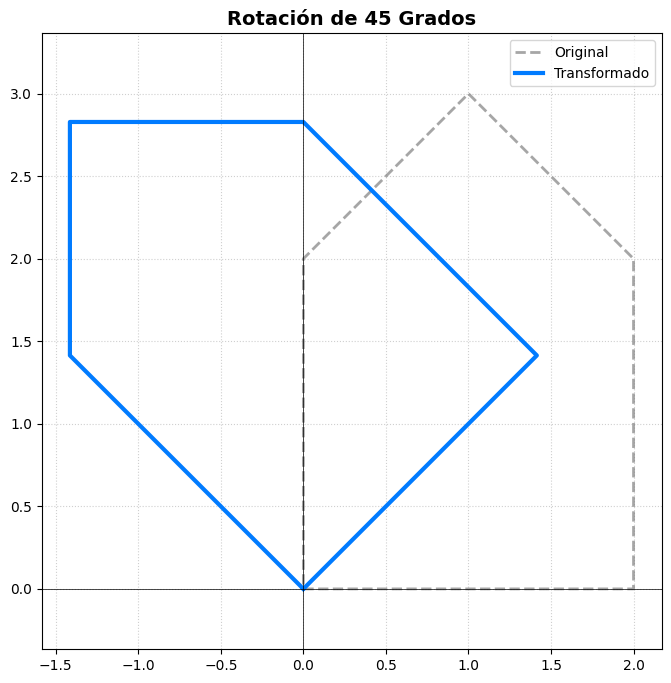

In [9]:
# EJEMPLO DE APLICACIÓN: ROTACIÓN

# 1. Definir la transformación (Ej: Rotar 45 grados)
angulo = 45
Matriz_Rotacion = obtener_matriz_rotacion(angulo)

# 2. Aplicar la transformación (Multiplicación Matricial)
# Usamos el operador '@' que en NumPy significa multiplicación de matrices
P_rotada = Matriz_Rotacion @ P_casa

# 3. Mostrar las matrices en texto (para verificar números)
print(f"Matriz de Rotación ({angulo}°):\n{Matriz_Rotacion}\n")
print(f"Coordenadas Originales:\n{P_casa}\n")
print(f"Coordenadas Nuevas:\n{np.round(P_rotada, 2)}") # Redondeamos para leer mejor

# 4. Visualizar el resultado
graficar_transformacion(P_casa, P_rotada, titulo=f"Rotación de {angulo} Grados")

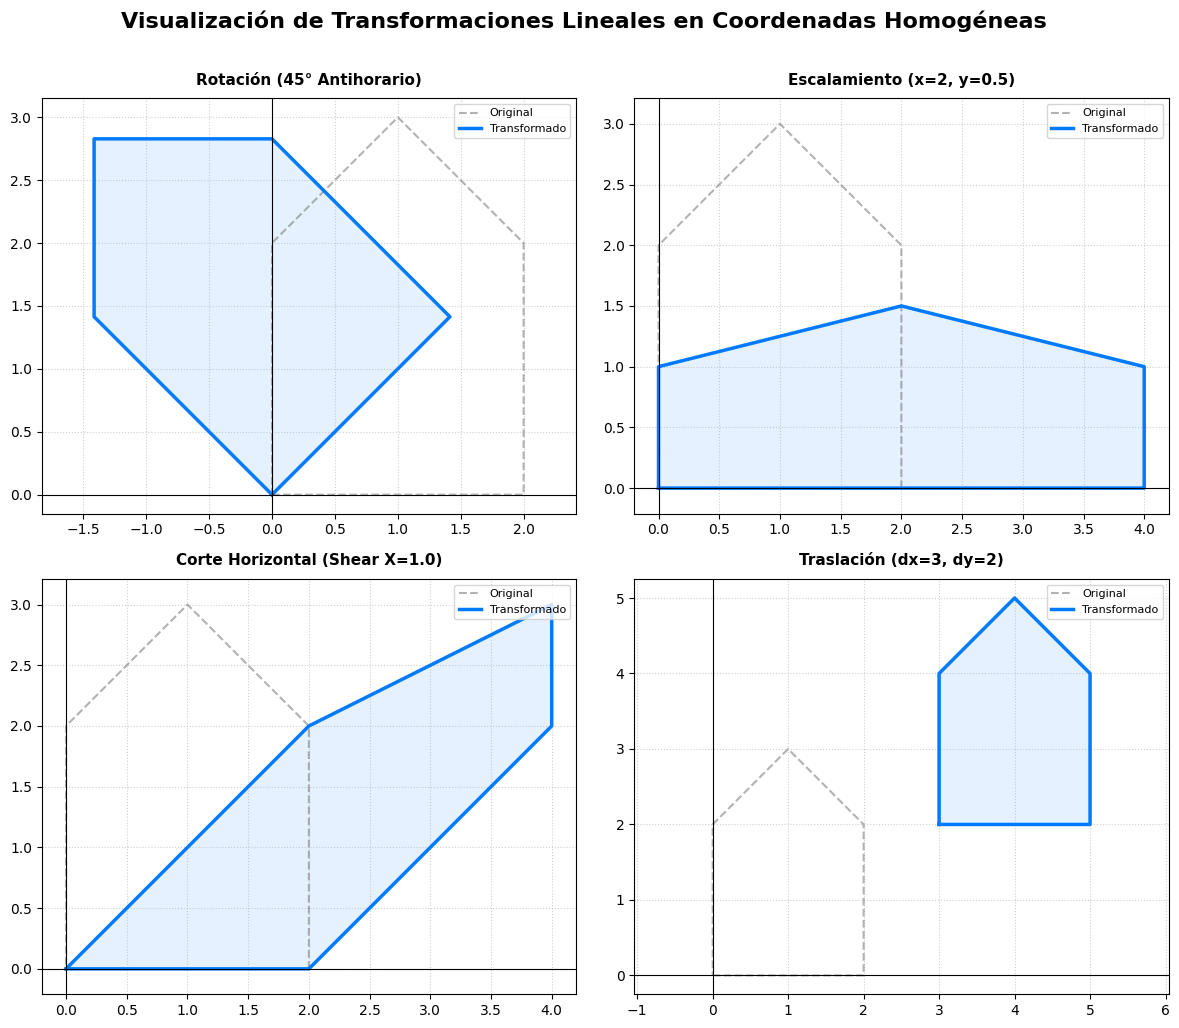

In [8]:
# ==========================================
# c. IMPLEMENTACIÓN Y VISUALIZACIÓN (GALERÍA COMPLETA)
# ==========================================

# Configuración del lienzo: 2 filas x 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(12, 11))
fig.suptitle('Visualización de Transformaciones Lineales en Coordenadas Homogéneas', fontsize=16, fontweight='bold', y=0.96)

# --- DEFINICIÓN DE LOS 4 CASOS SOLICITADOS ---

# CASO 1: ROTACIÓN (45 Grados)
# Rúbrica: "Rotar el objeto theta grados (ej. 45)"
T1 = obtener_matriz_rotacion(45)
titulo1 = "Rotación (45° Antihorario)"

# CASO 2: ESCALAMIENTO (No Uniforme)
# Rúbrica: "Escalar... (ej. x=2, y=0.5)"
T2 = obtener_matriz_escalado(2, 0.5)
titulo2 = "Escalamiento (x=2, y=0.5)"

# CASO 3: CORTE (SHEARING)
# Rúbrica: "Aplicar un corte horizontal"
# kx=1.0 significa que por cada unidad que sube en Y, se mueve 1 en X
T3 = obtener_matriz_corte(1.0, 0)
titulo3 = "Corte Horizontal (Shear X=1.0)"

# CASO 4: TRASLACIÓN
# Rúbrica: "Trasladar el objeto... (usando coordenadas homogéneas)"
T4 = obtener_matriz_traslacion(3, 2)
titulo4 = "Traslación (dx=3, dy=2)"

# Lista para iterar y graficar
casos = [
    (axs[0, 0], T1, titulo1),
    (axs[0, 1], T2, titulo2),
    (axs[1, 0], T3, titulo3),
    (axs[1, 1], T4, titulo4)
]

# --- BUCLE DE GRAFICADO ---
for ax, Matriz_T, titulo in casos:
    # 1. Calcular nuevos puntos: P' = T @ P
    P_primas = Matriz_T @ P_casa

    # 2. Dibujar ORIGINAL (Referencia en Gris Punteado)
    ax.plot(P_casa[0, :], P_casa[1, :], linestyle='--', color='gray', alpha=0.6, linewidth=1.5, label='Original')

    # 3. Dibujar TRANSFORMADO (Azul Sólido)
    # Relleno suave para resaltar el área
    ax.fill(P_primas[0, :], P_primas[1, :], color='#007bff', alpha=0.1)
    ax.plot(P_primas[0, :], P_primas[1, :], color='#007bff', linewidth=2.5, label='Transformado')

    # 4. Configuración estética de cada sub-gráfico
    ax.set_title(titulo, fontsize=11, fontweight='bold', pad=10)
    ax.axhline(0, color='black', linewidth=0.8) # Eje X
    ax.axvline(0, color='black', linewidth=0.8) # Eje Y
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.legend(loc='upper right', fontsize=8)
    ax.axis('equal') # VITAL: Mantiene la proporción 1:1

# Ajustar espacios
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<h2>4. Transformación Compuesta (Secuencia de Operaciones)</h2>

<p style="text-align: justify;">
  Una de las propiedades más potentes del álgebra lineal es la capacidad de combinar múltiples transformaciones en una sola matriz resultante.
  Si queremos aplicar una secuencia de transformaciones $T_1$, luego $T_2$, y finalmente $T_3$ a un vector $\mathbf{v}$, la operación se expresa como:
</p>

$$ \mathbf{v}' = T_3 \cdot (T_2 \cdot (T_1 \cdot \mathbf{v})) $$

<p style="text-align: justify;">
  Por la propiedad asociativa de la multiplicación matricial, podemos pre-calcular la <strong>Matriz Compuesta</strong> ($M_{total}$) multiplicando las matrices de transformación entre sí:
</p>

$$ M_{total} = T_3 \cdot T_2 \cdot T_1 $$

<div style="background-color: #fff3cd; padding: 15px; border-left: 5px solid #ffc107; color: #856404;">
  <p style="margin: 0;">
    <strong>⚠️ Regla de Oro (Orden de Multiplicación):</strong><br>
    Dado que el vector columna está a la derecha, las matrices se aplican de <strong>derecha a izquierda</strong>.
    <br><br>
    Si la secuencia lógica es: <em>"Primero Rotar ($R$), luego Escalar ($S$), luego Trasladar ($T$)"</em>, la ecuación matemática debe ser:
    $$ M_{final} = T \cdot S \cdot R $$
  </p>
</div>

<br>

<h3>4.1 La No Conmutatividad</h3>
<p style="text-align: justify;">
  A diferencia de la multiplicación de números reales (donde $5 \times 3 = 3 \times 5$), la multiplicación de matrices <strong>no es conmutativa</strong>.
  $$ A \cdot B \neq B \cdot A $$
  Esto significa que cambiar el orden de las transformaciones producirá un resultado geométrico y una posición final completamente diferentes.
</p>

Las 3 transformaciones elegidas:

Rotación: 90 grados.

Escalamiento: Reducir a la mitad (0.5).

Traslación: Mover 4 unidades a la derecha.

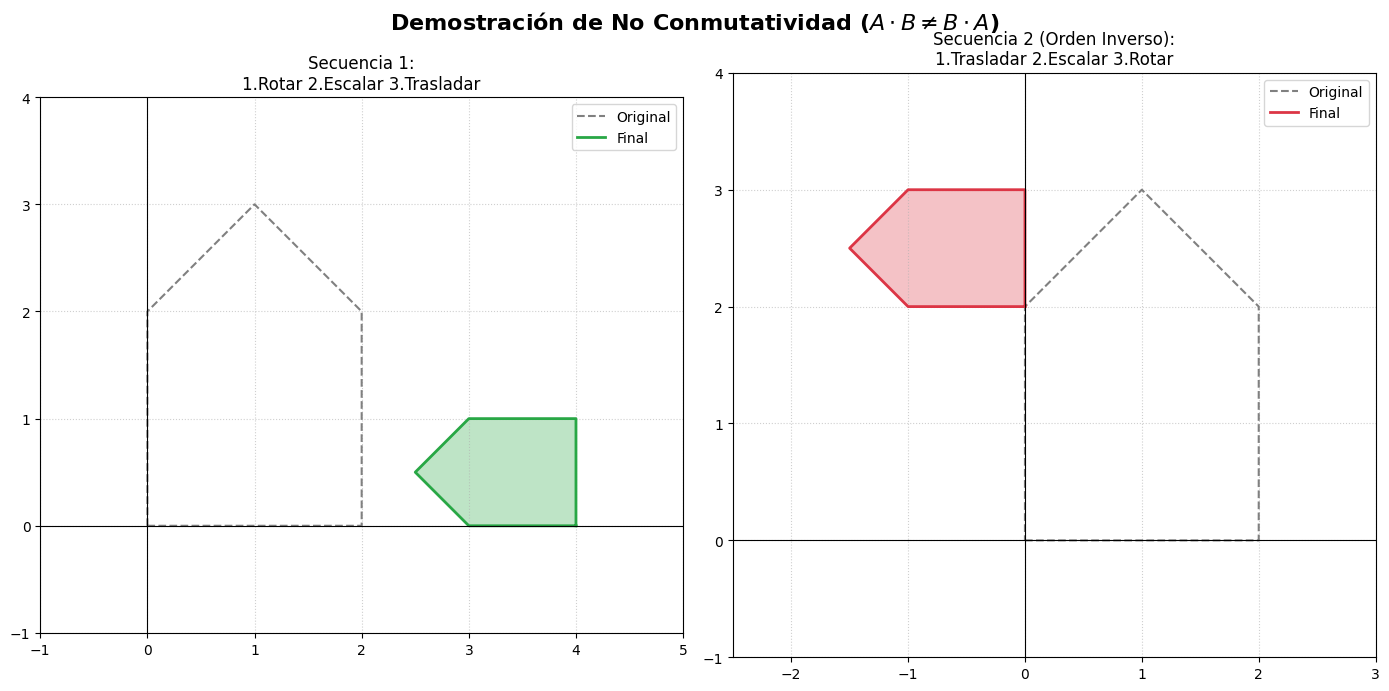

In [11]:
# ==========================================
# 4. TRANSFORMACIÓN COMPUESTA Y NO CONMUTATIVIDAD (CORREGIDO)
# ==========================================

# 1. DEFINIR LAS MATRICES INDIVIDUALES
# ------------------------------------
# A: Rotación de 90 grados
Matriz_Rot = obtener_matriz_rotacion(90)

# B: Escalamiento (Mitad de tamaño)
Matriz_Esc = obtener_matriz_escalado(0.5, 0.5)

# C: Traslación (4 en X, 0 en Y)
Matriz_Tras = obtener_matriz_traslacion(4, 0)


# 2. DEFINIR DOS SECUENCIAS DIFERENTES
# ------------------------------------

# SECUENCIA 1: Rotar -> Escalar -> Trasladar
# (Orden matemático: T_Tras @ T_Esc @ T_Rot)
M_Secuencia1 = Matriz_Tras @ Matriz_Esc @ Matriz_Rot

# SECUENCIA 2: Trasladar -> Escalar -> Rotar (Orden Inverso)
# (Orden matemático: T_Rot @ T_Esc @ T_Tras)
M_Secuencia2 = Matriz_Rot @ Matriz_Esc @ Matriz_Tras


# 3. FUNCIÓN AUXILIAR PARA AJUSTAR EL ZOOM
# ----------------------------------------
def ajustar_limites_inteligentes(ax, P_orig, P_fin):
    """Calcula los límites exactos para que todo quepa en la imagen con margen."""
    todos_x = np.concatenate((P_orig[0, :], P_fin[0, :]))
    todos_y = np.concatenate((P_orig[1, :], P_fin[1, :]))

    margen = 1.0 # Espacio extra alrededor
    ax.set_xlim(np.min(todos_x) - margen, np.max(todos_x) + margen)
    ax.set_ylim(np.min(todos_y) - margen, np.max(todos_y) + margen)


# 4. VISUALIZACIÓN COMPARATIVA
# ----------------------------
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Usamos r"" para evitar el SyntaxWarning con los símbolos de LaTeX
fig.suptitle(r'Demostración de No Conmutatividad ($A \cdot B \neq B \cdot A$)', fontsize=16, fontweight='bold')

# --- GRÁFICO 1: SECUENCIA LÓGICA (VERDE) ---
P_final_1 = M_Secuencia1 @ P_casa

axs[0].plot(P_casa[0, :], P_casa[1, :], '--', color='gray', label='Original', linewidth=1.5)
axs[0].fill(P_final_1[0, :], P_final_1[1, :], color='#28a745', alpha=0.3)
axs[0].plot(P_final_1[0, :], P_final_1[1, :], color='#28a745', linewidth=2, label='Final')

axs[0].set_title("Secuencia 1:\n1.Rotar 2.Escalar 3.Trasladar")
axs[0].grid(True, linestyle=':', alpha=0.6)
axs[0].axhline(0, color='black', linewidth=0.8); axs[0].axvline(0, color='black', linewidth=0.8)
axs[0].legend()
axs[0].set_aspect('equal') # Importante: Aspecto 1:1
ajustar_limites_inteligentes(axs[0], P_casa, P_final_1) # <--- AQUI SE ARREGLA EL ZOOM


# --- GRÁFICO 2: ORDEN INVERSO (ROJO) ---
P_final_2 = M_Secuencia2 @ P_casa

axs[1].plot(P_casa[0, :], P_casa[1, :], '--', color='gray', label='Original', linewidth=1.5)
axs[1].fill(P_final_2[0, :], P_final_2[1, :], color='#dc3545', alpha=0.3)
axs[1].plot(P_final_2[0, :], P_final_2[1, :], color='#dc3545', linewidth=2, label='Final')

axs[1].set_title("Secuencia 2 (Orden Inverso):\n1.Trasladar 2.Escalar 3.Rotar")
axs[1].grid(True, linestyle=':', alpha=0.6)
axs[1].axhline(0, color='black', linewidth=0.8); axs[1].axvline(0, color='black', linewidth=0.8)
axs[1].legend()
axs[1].set_aspect('equal') # Importante: Aspecto 1:1
ajustar_limites_inteligentes(axs[1], P_casa, P_final_2) # <--- AQUI SE ARREGLA EL ZOOM

plt.tight_layout()
plt.show()

## 5. Conclusiones y Reflexión Final

A lo largo de este proyecto, hemos demostrado cómo conceptos abstractos del **Álgebra Lineal** se convierten en herramientas tangibles para la manipulación de gráficos por computadora. La implementación en Python nos ha permitido visualizar la teoría matemática en acción.

Los hallazgos principales de este trabajo son:

* **Unificación mediante Coordenadas Homogéneas:**
    Al proyectar nuestros puntos 2D en un espacio de 3D (agregando $w=1$), logramos tratar la **traslación** como una multiplicación matricial lineal. Esto nos permitió estandarizar todas las transformaciones (rotación, escala, corte y traslación) bajo matrices de $3 \times 3$.

* **Eficiencia Computacional:**
    En lugar de calcular trigonométricamente la nueva posición de cada punto uno por uno, demostramos que podemos transformar una figura compleja (como nuestra "Casa" de 5 vértices) en un solo paso de cálculo utilizando la operación $P' = T \cdot P$.

* **La No Conmutatividad ($A \cdot B \neq B \cdot A$):**
    Como se evidenció en la última sección, el orden en que aplicamos las transformaciones es crítico. Rotar y luego trasladar genera un resultado geométrico completamente diferente a trasladar y luego rotar. Esto confirma que la multiplicación de matrices no es conmutativa.

---

> **Impacto Real:**
> Estos principios no son solo ejercicios académicos; son el motor fundamental detrás de todo software de diseño (CAD), animación 3D, y los motores de videojuegos modernos. Cada vez que un personaje se mueve o rota en una pantalla, detrás de escena hay una matriz multiplicando millones de vértices por segundo, siguiendo exactamente la lógica que hemos programado aquí.